In [7]:
import numpy as np
import math
import timeit
from collections import defaultdict, Counter
from functools import reduce, lru_cache
from multiprocessing import Pool
import itertools
import tqdm
import matplotlib.pyplot as plt

import datetime
import string

from math import sqrt

%matplotlib inline

## Problem 3

In [2]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0:
                return False
        return True
    else:
        return False


In [70]:
num = 600851475143
sqr = math.ceil(math.sqrt(num))
if sqr % 2 == 0:
    sqr -= 1
for i in range(sqr, 3, -2):
    if num % i == 0 and is_prime(i):
        print(i)
        break

6857


In [31]:
def prime_list(n):
    if n > 2:
        list_of_primes = [2]    
    else: 
        return []
    for i in range(3, n, 2):
        if is_prime(i):
            list_of_primes.append(i)
    return list_of_primes

In [16]:
def prime_generator(n):
    if n % 2 == 0:
        i = n-1
    else:
        i = n
    while i > 1:
        if is_prime(i):
            yield i
        i -= 2
    if n > 1:
        yield 2
    

In [13]:
pg = prime_generator(13)

In [6]:
prime_list(10)

[2, 3, 5, 7]

In [69]:
test_number = 600851475143
for prime in prime_generator(math.ceil(math.sqrt(test_number))):
    if test_number % prime == 0:
        print(prime)
        break
else:
    print("Something went wrong")

6857


## Problem 5

In [11]:
8*9*5*7

2520

In [26]:
def prime_factorization(n):
    factor = 2
    factors = defaultdict(int)
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors[factor] += 1
        else:
            break
    factor = 3
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors[factor] += 1
        else:
            factor += 2
    return factors
        

In [51]:
most_prime_factors = defaultdict(int)  # defaults to 0
for divisor in range(2, 21):
    for prime_factor, occurances in prime_factorization(divisor).items():
        if occurances > most_prime_factors[prime_factor]:
            most_prime_factors[prime_factor] = occurances
        

In [52]:
total = 1
for prime_factor, occurance in most_prime_factors.items():
    total *= prime_factor**occurance
    
print(total)

232792560


In [56]:
reduce(lambda x, y: x*y, [prime_factor**occurances for prime_factor, occurances in most_prime_factors.items()])

232792560

## Problem 7

In [43]:
pool = Pool()

In [34]:
def is_prime(number, list_of_primes):
    for old_prime in list_of_primes:
        if old_prime**2 > number:  # if we have gotten past the point of no return
            return True
            
        if number % old_prime == 0:
            return False

    raise RuntimeError("Should not have gotten here")
    
    

In [35]:
def is_prime2(number, list_of_primes, number_of_primes):
    #print(list_of_primes, number_of_primes)
    for old_prime in list_of_primes[:number_of_primes]:
        if old_prime**2 > number:  # if we have gotten past the point of no return
            return True
            
        if number % old_prime == 0:
            return False

    raise RuntimeError("Should not have gotten here")
    
    

In [47]:
def tester(args):
    old_prime = args[0]
    number = args[1]

    if old_prime**2 > number:  # if we have gotten past the point of no return
        return True
            
    if number % old_prime == 0:
        return False
    
    return True

    
def is_prime3(number, list_of_primes):
    new_list = [(prime, number) for prime in list_of_primes]
    list_of_bools = pool.map(tester, new_list)
    return all(list_of_bools)
    #for old_prime in list_of_primes:


    #raise RuntimeError("Should not have gotten here")
    
    

In [38]:
n = 10001
prime_count = 1
list_of_primes = [2]  # make a list of length n
number = 3
while(prime_count < n):
    if is_prime(number, list_of_primes):  # if number is prime
        #list_of_primes[prime_count] = number
        prime_count += 1
        list_of_primes.append(number)
    
    number += 1
    
print(list_of_primes[-1])
        

104743


In [ ]:
n = 10001
prime_count = 1
list_of_primes = [2]  # make a list of length n
number = 3
while(prime_count < n):
    if is_prime3(number, list_of_primes):  # if number is prime
        #list_of_primes[prime_count] = number
        prime_count += 1
        list_of_primes.append(number)
    
    number += 1
    
print(list_of_primes[-1])
        

## Problem 8

In [4]:
in_string = """
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
""".replace('\n', '')

In [24]:
in_list = np.array(list(in_string), dtype=int)

In [95]:
%time
def mult(letters):
    accum = 1
    for letter in letters:
        accum *= int(letter)
        
    return accum

ln = len(in_list)
N = 13

biggest = 0
biggest_i = -1

for i in range(ln-N+1):
    product = mult(in_list[i:i+N])
    if product > biggest:
        biggest_i = i
        biggest = product

print(mult(in_list[biggest_i:biggest_i+N]), in_list[biggest_i:biggest_i+N])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
23514624000 [5 5 7 6 6 8 9 6 6 4 8 9 5]


In [94]:
%time
N = 13

biggest = 0
biggest_i = -1

i = 0
while i < ln - N:
    sub_number = in_list[i:i+N]
    for j, sub_sub in enumerate(sub_number):
        if sub_sub == 0:
            #print("Found 0 at index {:d}".format(i+j))
            i += j + 1
            break
    #if ('0' in sub_number):
    else:  # no zeros
        product = mult(sub_number)
        
        if product > biggest:
            biggest_i = i
            biggest = product
 
        i = i + 1
    
    #print("Current index: {:d}".format(i))
       
print(mult(in_list[biggest_i:biggest_i+N]), in_list[biggest_i:biggest_i+N])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
23514624000 [5 5 7 6 6 8 9 6 6 4 8 9 5]


In [102]:
%time
N = 13

biggest = 0
biggest_i = -1

product = None #mult(in_list[:N])

i = 0
while i < ln - N:
    new_number = in_list[i+N-1]
    
    if new_number == 0:
        i = i + N 
        product = None
    else:  # not zero
        if product is None:
            product = mult(in_list[i:i+N])
        else:
            product /= in_list[i-1]
            product *= new_number
        
        if product > biggest:
            biggest_i = i
            biggest = product
 
        i = i + 1
    
    #print("Current index: {:d}".format(i))
       
print(mult(in_list[biggest_i:biggest_i+N]), in_list[biggest_i:biggest_i+N])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
23514624000 [5 5 7 6 6 8 9 6 6 4 8 9 5]


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in long_scalars


In [ ]:
for i, letter in enumerate(['a', 'b', 'c']):
    print(i, letter)

In [53]:
%time
N = 13

def test_key(ind_letter):
    index = ind_letter[0]
    letter = ind_letter[1]
    return mult(in_string[index:index+N])

biggest_i, _ = max(enumerate(in_string), key=test_key)
print(in_string[biggest_i:biggest_i+N])

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
5576689664895


## Problem 9

In [9]:
target = 10000
for a in range(1, target):
    for b in range(a+1, (target - a)//2+1):
        c = target - b - a
        if a**2 + b**2 == c**2:
            print(a, b, c, a*b*c)
            
    

2000 3750 4250 31875000000


In [16]:
# m(m+n) == 5000
# m > n
target = 500
for n in range(1, target):
    for m in range(n+1, target):
        if m*(m + n) == target:
            print(m, n)
            print("a = {:d} b = {:d} c = {:d}".format(2*m*n, (m**2 - n**2), (m**2 + n**2)))
    

20 5
a = 200 b = 375 c = 425


## Problem 10

In [26]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0:
                return False
        return True
    else:
        return False

    
def prime_generator(n):
    if n % 2 == 0:
        i = n-1
    else:
        i = n
    while i > 1:
        if is_prime(i):
            yield i
        i -= 2
    if n > 1:
        yield 2
    
    

In [27]:
sum(prime_generator(2000000))

142913828922

In [ ]:
"""
To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:
Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
Initially, let p equal 2, the smallest prime number.
Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.
"""

In [22]:
def sieve(N):
    list_of_numbers = [False, False, True] + [True]*(N-3)
    p = 2

    while p*p < N:
        for i in range(p+p, N, p):
            list_of_numbers[i] = False
        # set p to next prime

        p += 1
        while not list_of_numbers[p]:
            p += 1

    return np.nonzero(list_of_numbers)[0]
        

In [28]:
sum(sieve(2000000))

142913828922

## Problem 11

In [22]:
number_array = np.loadtxt('Data/pe_problem11.txt', dtype='int')
window_size = (4, 4)
row_size, column_size = number_array.shape

In [63]:
largest_product = 0
for r in range(row_size-window_size[0]+1):
    for c in range(column_size-window_size[1]+1):
        # select subset
        subset = number_array[r:r+window_size[0],
                              c:c+window_size[1]]
        horizontal = subset[0]
        vertical = subset[:, 0]
        diagonal = subset.diagonal()
        cross_diagonal = subset.ravel()[3:13:3]
        largest_product = max((largest_product, 
                               np.prod(horizontal),
                               np.prod(vertical),
                               np.prod(diagonal),
                               np.prod(cross_diagonal)))
        
print(largest_product)

70600674


## Problem 12

In [26]:
def prime_factorization(n):
    factor = 2
    factors = defaultdict(int)
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors[factor] += 1
        else:
            break
    factor = 3
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors[factor] += 1
        else:
            factor += 2
    return factors

In [32]:
def get_num_factors(n):
    prime_factors = prime_factorization(n)
    return np.prod(np.array(list(prime_factors.values()))+1)

In [31]:
num_factors(28)

6

In [36]:
triangle = 0
i = 1
num_factors = 0
while num_factors < 500:
    triangle += i
    i += 1
    num_factors = get_num_factors(triangle)

    
print(i-1, triangle, num_factors)

12375 76576500 576


## Problem 13

In [41]:
numbers = """37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690"""

In [45]:
sum([int(n) for n in numbers.split('\n')])

5537376230390876637302048746832985971773659831892672

In [ ]:
'5537376230'

In [51]:
sum([int(n[:12]) for n in numbers.split('\n')])

55373762303860

## Problem 14

In [2]:
@lru_cache(maxsize=None)
def collatz_chain(N):
    #print(N)
    if N <= 1:
        return 1
    elif (N % 2 == 0):
        return 1 + collatz_chain(N//2)
    else:
        return 1 + collatz_chain(3*N + 1)
        

In [3]:
max_chain = 0
max_index = 0
for N in range(1, 1000000):
    if collatz_chain(N) > max_chain:
        max_chain = collatz_chain(N)
        max_index = N
    #max_chain = max(max_chain, collatz_chain(N))

In [27]:
print(max_chain, max_index)

(525, 837799) 837799


In [30]:
tuple1 = (0, 2)
tuple2 = (1, 0)

def second_value(t):
    return t[1]

def first_value(t):
    return t[0]

sorted([tuple1, tuple2], key=lambda t: t[0])

[(0, 2), (1, 0)]

In [10]:
second_value(tuple1)

2

In [26]:
max_chain = (0, 0)
for N in range(1, 1000000):
    max_chain = max(max_chain, (collatz_chain(N), N), key=lambda t: t[0])

## Problem 15

In [1]:
['r']*3+['d']*3

['r', 'r', 'r', 'd', 'd', 'd']

In [4]:
for N in range(2, 6):
    print(len(set(itertools.permutations(['r']*N+['d']*N))))

6
20
70
252


In [9]:
for N in [20]:
    print(math.factorial(2*N)/(math.factorial(N)*
                               math.factorial(N)))

137846528820.0


## Problem 16

In [16]:
big_num = 2 << 999

In [20]:
def sum_digits(n):
    r = 0
    while n:
        r, n = r + n % 10, n // 10
    return r

In [21]:
sum_digits(big_num)

1366

## Problem 17

In [528]:
below_20 = {0: '', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 9: 'nine',
         10: 'ten', 11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 16: 'sixteen',
         17: 'seventeen', 18: 'eighteen', 19: 'nineteen'}
tens = {2: 'twenty', 3: 'thirty', 4: 'forty', 5: 'fifty', 6: 'sixty', 7: 'seventy', 8: 'eighty', 9: 'ninety'}

total_length = 0
for number in range(1, 1001):
#for number in [342, 115]:
    if number == 1000:
        hundreds_string = 'one thousand'
        tens_string = ''
        separator_string = ''
        ones_string = ''
    else:
        
        tens_place = (number % 100)//10
        hundreds_place = (number)//100

        if hundreds_place > 0:
            hundreds_string = below_20[hundreds_place] + ' hundred'
            separator_string = ' and '
        else:
            hundreds_string = ''
            separator_string = ''

        if tens_place > 1:
            ones_place = number % 10 
            tens_string = tens[tens_place]
            ones_string = below_20[ones_place]
        elif tens_place == 1:
            ones_place = number % 100
            tens_string = ''
            ones_string = below_20[ones_place]

        elif tens_place == 0:
            tens_string = ''
            ones_place = number % 10
            if ones_place == 0:
                separator_string = ''

            ones_string = below_20[ones_place]

    full_string = "{:s}{:s}{:s} {:s}".format(hundreds_string, separator_string, tens_string, ones_string)
    print(full_string, len(full_string.replace(' ', '') ))
    total_length += len(full_string.replace(' ', ''))


 one 3
 two 3
 three 5
 four 4
 five 4
 six 3
 seven 5
 eight 5
 nine 4
 ten 3
 eleven 6
 twelve 6
 thirteen 8
 fourteen 8
 fifteen 7
 sixteen 7
 seventeen 9
 eighteen 8
 nineteen 8
twenty  6
twenty one 9
twenty two 9
twenty three 11
twenty four 10
twenty five 10
twenty six 9
twenty seven 11
twenty eight 11
twenty nine 10
thirty  6
thirty one 9
thirty two 9
thirty three 11
thirty four 10
thirty five 10
thirty six 9
thirty seven 11
thirty eight 11
thirty nine 10
forty  5
forty one 8
forty two 8
forty three 10
forty four 9
forty five 9
forty six 8
forty seven 10
forty eight 10
forty nine 9
fifty  5
fifty one 8
fifty two 8
fifty three 10
fifty four 9
fifty five 9
fifty six 8
fifty seven 10
fifty eight 10
fifty nine 9
sixty  5
sixty one 8
sixty two 8
sixty three 10
sixty four 9
sixty five 9
sixty six 8
sixty seven 10
sixty eight 10
sixty nine 9
seventy  7
seventy one 10
seventy two 10
seventy three 12
seventy four 11
seventy five 11
seventy six 10
seventy seven 12
seventy eight 12
seventy 

In [514]:
len("ten hundred".replace(" ", ""))

10

In [510]:
len("onethousand")

11

In [529]:
total_length

21124

## Problem 18

In [43]:
A = np.array(((3, 0, 0, 0), (7, 4, 0, 0), (2, 4, 6, 0), (8, 5, 9, 3)))

In [44]:
A

array([[3, 0, 0, 0],
       [7, 4, 0, 0],
       [2, 4, 6, 0],
       [8, 5, 9, 3]])

In [52]:
num_rows, num_columns = A.shape

In [60]:
path_sum = A[-1].copy()

In [61]:
for r in range(num_rows - 1, 0, -1):  # from num_rows -1 to 1 inclusive
    for c in range(0, r):  # to r-1 inclusive
        path_sum[c] = max(path_sum[c] + A[r - 1, c],
                          path_sum[c + 1] + A[r - 1, c])

print(path_sum[0])

[8 5 9 3]
[10 13 15  3]
[20 19 15  3]
23


In [67]:
import pandas as pd

In [78]:
A = pd.read_table('pe_prob18_triangle.txt', delimiter=' ',
                  names=[str(i) for i in range(15)]).values

In [79]:
num_rows, num_columns = A.shape
path_sum = A[-1].copy()

In [80]:
for r in range(num_rows - 1, 0, -1):  # from num_rows -1 to 1 inclusive
    for c in range(0, r):  # to r-1 inclusive
        path_sum[c] = max(path_sum[c] + A[r - 1, c],
                          path_sum[c + 1] + A[r - 1, c])

print(path_sum[0])

1074.0


In [17]:
triangle = [
[3],
[7, 4],
[2, 4, 6],
[8, 5, 9, 3]
]

while len(triangle) > 1:
    for i in range(len(triangle[-2])):
        entry = triangle[-2][i]
        triangle[-2][i] = max(entry+triangle[-1][i],
                              entry+triangle[-1][i+1])

    triangle = triangle[:-1]

print(triangle[0])

[23]


In [19]:
triangle = [
[75],
[95,64],
[17,47,82],
[18,35,87,10],
[20,4,82,47,65],
[19,1,23,75,3,34],
[88,2,77,73,7,63,67],
[99,65,4,28,6,16,70,92],
[41,41,26,56,83,40,80,70,33],
[41,48,72,33,47,32,37,16,94,29],
[53,71,44,65,25,43,91,52,97,51,14],
[70,11,33,28,77,73,17,78,39,68,17,57],
[91,71,52,38,17,14,91,43,58,50,27,29,48],
[63,66,4,68,89,53,67,30,73,16,69,87,40,31],
[4,62,98,27,23,9,70,98,73,93,38,53,60,4,23]]

while len(triangle) > 1:
    for i in range(len(triangle[-2])):
        entry = triangle[-2][i]
        triangle[-2][i] = max(entry+triangle[-1][i],
                              entry+triangle[-1][i+1])

    triangle = triangle[:-1]
    
print(triangle)

[[1074]]


## Problem 19

In [18]:
days_in_months = [31, 28, 31, 30, 31, 30, 31, 30, 31, 30, 31]

4

In [10]:
def is_sunday(datetime):
    return datetime.weekday() == 6


In [11]:
num_first_sundays = 0
for year in range(1901, 2001):
    for month in range(1, 13):
        num_first_sundays += is_sunday(datetime.datetime(year=year, month=month, day=1))
        
print(num_first_sundays)

171


## Problem 20

In [22]:
def factorial1(N):  # restricted to positive
    
    if N == 0:
        return 1
    
    if N < 0:
        raise ValueError("Cannot use negatives")

    return N*factorial1(N-1)
    
    
def factorial2(N):
    holder = 1
    for i in range(1, N+1):
        holder *= i
        
    return holder


In [25]:
total = 0 
for digit in str(factorial1(100)):
    total += int(digit)
    
print(total)

648


## Problem 21

In [24]:
def prime_factorization(n):
    factor = 2
    factors = []
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors.append(factor)
        else:
            break
    factor = 3
    while n > 1:
        if n % factor == 0:
            n /= factor
            factors.append(factor)
        else:
            factor += 2
    return factors
        

In [25]:
def mul_reduce(l):
    tot = 1
    for i in l:
        tot *= i
        
    return tot


In [31]:
def sum_of_proper_divisors(N):
    primes = prime_factorization(N)
    primes.append(1)
    Nprimes = len(primes)
    proper_divisors = set()

    for n in range(1, Nprimes+1):
        for combo in itertools.combinations(primes, n):
            proper_divisors.add(mul_reduce(combo))

    d = sum(proper_divisors) - N
    return d


In [49]:
N = 10000
pairs = []

for number in range(2, N):
    if number in pairs:
        continue

    d = sum_of_proper_divisors(number)
    if number == sum_of_proper_divisors(d) and d != number:
        pairs.extend([number, d])
            

In [50]:
pairs

[220, 284, 1184, 1210, 2620, 2924, 5020, 5564, 6232, 6368]

In [51]:
sum(pairs)

31626

In [530]:
def get_proper_divisors(n):
    proper_divisors = []
    for i in range(n//2, 0, -1):
        if n%i == 0:
            proper_divisors.append(i)
    return proper_divisors


def get_next_number(N, checked):
    for i, c in enumerate(checked[N:]):
        if c is False:
            return i+N
            break
    else:  # no break
        return len(checked)

In [53]:
N = 10000

In [54]:
i = 2
checking = i
checked = [False]*N

checked[0] = True
checked[1] = True

amicable_numbers = []

while checking < N:
    sum_of_pds1 = sum(get_proper_divisors(checking))
    checked[checking] = True
    
    if (sum_of_pds1 < N) and (not checked[sum_of_pds1]):
        sum_of_pds2 = sum(get_proper_divisors(sum_of_pds1))
        if checking == sum_of_pds2:
            amicable_numbers += [checking, sum_of_pds1]  # append
            checked[sum_of_pds1] = True
            checking = get_next_number(i, checked)
            
        else:
            checking = sum_of_pds1
    else:
        checking = get_next_number(i, checked)



In [56]:
sum(amicable_numbers)

31626

## Problem 22

In [29]:
alphadict = {k: i for i, k in enumerate(string.ascii_uppercase)}

In [16]:
with open('./p022_names.txt') as name_file:
    names = name_file.read().replace('"', '').split(',')
    


In [30]:
name = names[0]

In [36]:
STARTNUM = ord('A')-1  # want 'A' to give 1


57

In [48]:
sum(map(lambda arg: sum(map(lambda l: ord(l)-(ord('A')-1), arg[1]))*(arg[0]+1),
    enumerate(sorted(open('./p022_names.txt').read().replace('"', '').split(',')))))


871198282

In [85]:
STARTNUM = ord('A')-1  # want 'A' to give 1

total_score = 0

with open('./p022_names.txt') as name_file:
    names= name_file.read().replace('"', '').split(',')
    for i, name in enumerate(sorted(names)):
        name_score = sum(ord(letter)-STARTNUM for letter in name)
        total_name_score = name_score*(i+1)  # 1 based indexing
        total_score += total_name_score

In [86]:
total_score

871198282

## Problem 23

In [554]:
def is_abundant(num):
    return sum(proper_divs(num)) > num


In [2]:

MUL = int.__mul__
 
def prime_factors(n):
    'Map prime factors to their multiplicity for n'
    d = _divs(n)
    d = [] if d == [n] else (d[:-1] if d[-1] == d else d)
    pf = Counter(d)
    return dict(pf)
 
@lru_cache(maxsize=None)
def _divs(n):
    'Memoized recursive function returning prime factors of n as a list'
    for i in range(2, int(sqrt(n)+1)):
        d, m  = divmod(n, i)
        if not m:
            return [i] + _divs(d)
    return [n]
 

In [3]:
def proper_divs(n):
    '''Return the set of proper divisors of n.'''
    pf = prime_factors(n)
    pfactors, occurrences = pf.keys(), pf.values()
    multiplicities = itertools.product(*(range(oc + 1) for oc in occurrences))
    divs = {reduce(MUL, (pf**m for pf, m in zip(pfactors, multis)), 1)
            for multis in multiplicities}
    try:
        divs.remove(n)
    except KeyError:
        pass
    return divs or ({1} if n != 1 else set())
 

In [4]:
proper_divs(28)

{1, 2, 4, 7, 14}

In [576]:
upper_bound = 28123
abundant_numbers = []

for i in range(1, upper_bound):
    if is_abundant(i):
        abundant_numbers.append(i)

In [584]:
can_be_made = np.zeros(28124, dtype=bool) 

In [585]:
for combination in itertools.combinations_with_replacement(abundant_numbers, 2):
    try:
        can_be_made[int(sum(combination))] = True
    except IndexError:
        pass

In [586]:
can_be_made[24]

True

In [587]:
sum_cannot_be_made = 0
for i, b in enumerate(can_be_made):
    if not b:
        sum_cannot_be_made += i
        
print(sum_cannot_be_made)

4179871


## Problem 24

In [401]:
for i, permutation in enumerate(itertools.permutations(list(range(10)), 10)):
    if i == 999999:
        print(permutation)
        break

(2, 7, 8, 3, 9, 1, 5, 4, 6, 0)


## Problem 25

In [130]:
def fibonacci(N):
    """
    Return fibonacci number, where N must be > 2
    """
    f1, f2 = 1, 1
    yield 1
    yield 1
    i = 2
    while i < N:
        f2, f1 = f1 + f2, f2
        yield f2
        i += 1

In [134]:
for i, fib in enumerate(fibonacci(10000)):
    if len(str(fib)) >= 1000:
        print(i+1, fib)
        break
else:
    print("Not found")

4782 10700662663827589367649805844573968850836838966321516650132352033753145206046940406218891475824897926578046948881775919574843364666725699595129960304612627480924821861440694330512347744427502737817530875793916661921492591867595539664228371489431130746995034395470019854326097230672901928705264472437261177158218255484911205250132014786129659313817922355596574520395061375514678375432291196021299340482607061753977068470682028954869026661854351245219003694806413574474709117076197669456910700980243934396174741037369125032313655321647736970231677550515951735184605799549194109677783732296657965816465139034881542563101842241902598460880001101862555502454939371136516570394476295847145485234259504285824253060835444354282126110089928637950480068943303097732178348645431132057656598684562886168087186938352973506439862976406600007235629179052070511640776148124918858309459405666883391093509444565763576661516193177537928916615813271596168774879838218204925203484738743847367719345127870292186362506

## Problem 27

In [24]:
def make_quadratic(a, b):
    def _quadratic(n):
        return n**2 + a*n + b
    
    return _quadratic

quadratic = make_quadratic(1, 41)

In [28]:
def prime_chain(a, b):
    quadratic = make_quadratic(a, b)
    N = 0
    while is_prime(quadratic(N)):
        N += 1
        
    return N


In [35]:
max_chain = (0, 0, 0)
for a in range(-999, 1000):
    for b in range(-1000, 1001):
        max_chain = max(max_chain, (prime_chain(a, b), a, b), key=lambda x: x[0])
        
print(max_chain)

(71, -61, 971)


In [36]:
-61*971

-59231

## Problem 29

In [53]:
unique_numbers = set()
for a in range(2, 101):
    for b in range(2, 101):
        unique_numbers.add(a**b)
        
print(len(unique_numbers))

9183


## Problem 30

In [369]:
power = 5
accum = 0
for i in range(2, 1000000):
    str_num = str(i)
    sum_ = sum([int(digit)**power for digit in str_num])
    if sum_ == i:
        accum += i

In [370]:
print(accum)

443839


## Problem 32

In [79]:
def is_pandigital(number):
    return Counter(number) == Counter(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
           

In [90]:
pandigital_products = set()
for multiplicand in range(10000):
    for multiplier in range(100):
        product = multiplicand * multiplier
        if is_pandigital(list(str(multiplicand)) +
                         list(str(multiplier)) +
                         list(str(product))):
            pandigital_products.add(product)
            
print(sum(pandigital_products))

45228


In [91]:
pandigital_products

{4396, 5346, 5796, 6952, 7254, 7632, 7852}

## Problem 33

In [5]:

MUL = int.__mul__
 
def prime_factors(n):
    'Map prime factors to their multiplicity for n'
    d = _divs(n)
    d = [] if d == [n] else (d[:-1] if d[-1] == d else d)
    pf = Counter(d)
    return dict(pf)
 
@lru_cache(maxsize=None)
def _divs(n):
    'Memoized recursive function returning prime factors of n as a list'
    for i in range(2, int(sqrt(n)+1)):
        d, m  = divmod(n, i)
        if not m:
            return [i] + _divs(d)
    return [n]
 

In [6]:
def proper_divs(n):
    '''Return the set of proper divisors of n.'''
    pf = prime_factors(n)
    pfactors, occurrences = pf.keys(), pf.values()
    multiplicities = itertools.product(*(range(oc + 1) for oc in occurrences))
    divs = {reduce(MUL, (pf**m for pf, m in zip(pfactors, multis)), 1)
            for multis in multiplicities}
    try:
        divs.remove(n)
    except KeyError:
        pass
    return divs or ({1} if n != 1 else set())

In [15]:
numerator = 49
denomenator = 98
largest_common = max(proper_divs(numerator).intersection(proper_divs(denomenator)))
numerator/largest_common, denomenator/largest_common

(7.0, 14.0)

In [17]:
49/98

0.5

## Problem 34

In [371]:
def factorial(n):
    accum = 1
    for i in range(1, n+1):
        accum *= i
    
    return accum

In [391]:
factorials = [factorial(i) for i in range(10)]

In [392]:
factorials

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

In [393]:
for num in range(3, 1000000):
    str_num = str(num)
    sum_ = sum([factorials[int(digit)] for digit in str_num])
    if sum_ == num:
        print(num)

145
40585


In [394]:
145+40585

40730

## Problem 37

In [ ]:
def is_prime(number, list_of_primes):
    if number > 1:
        for old_prime in list_of_primes:
            if old_prime**2 > number:  # if we have gotten past the point of no return
                return True

            if number % old_prime == 0:
                return False

        raise RuntimeError("Should not have gotten here")
    else:
        return False

In [64]:
n = 11
prime_count = 0
truncatable_primes = []
list_of_primes = [2, 3, 5, 7]  # make a list of length n
number = 11
while(prime_count < n):
    if is_prime(number, list_of_primes):  # if number is prime
        list_of_primes.append(number)
        
        # left -> right
        num_str = str(number) 
        for i in range(len(num_str)):
            if not is_prime(int(num_str[i:]), list_of_primes):
                break
        else:  # no break must be truncatable from left-> right
            # Check right -> left
            for i in range(len(num_str)):
                if not is_prime(int(num_str[:len(num_str)-i]), list_of_primes):
                    break
            else:  # no break
                truncatable_primes.append(number)
                prime_count += 1
        
    number += 2
    


In [66]:
sum(truncatable_primes)

748317

## Problem 38

In [38]:
pandigitals = [i for i in itertools.permutations('123456789')]

In [109]:
N = 500
Ns = np.arange(1, 2001)
ints = np.arange(1, 11)
numbers = Ns[:, None]*ints[None, :]

In [91]:
def is_pandigital(s):
    return Counter(s) == Counter('123456789')

In [110]:
largest_pandigital = (0, 0, 0)
for i, number_list in enumerate(map(lambda a: ["".join(a.astype('str')[:i])
                                          for i in range(1, len(a.astype('str')))],
                               numbers)):
    for j, number in enumerate(number_list):
        if is_pandigital(number):
            largest_pandigital = max(largest_pandigital, (int(number), i, j),
                                     key=lambda t: t[0])


In [114]:
9786*2

19572

In [111]:
largest_pandigital

(918273645, 8, 4)

In [ ]:
978654312

## Problem 40

In [28]:
# Empty to start
digits = {1: 0, 10: 0, 100: 0, 1000: 0, 10000: 0, 100000: 0, 1000000: 0}
num = 0
i = 0
while i < 1000000:
    num += 1
    for digit in str(num):
        i += 1
        if i in digits:
            digits[i] = int(digit)

1 1
10 1
100 5
1000 3
10000 7
100000 2
1000000 1


In [30]:
reduce(int.__mul__, digits.values(), 1)

210

## Problem 41

In [7]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0:
                return False
        return True
    return False

In [2]:
sum(range(1, 10))  # a 9 digit pandigital is never prime

45

In [3]:
sum(range(1, 9))  # neither is a 8 digit

36

In [6]:
for N in range(2, 10):
    print(N, sum(range(1, N)), sum(range(1, N)) % 3 == 0)

2 1 False
3 3 True
4 6 True
5 10 False
6 15 True
7 21 True
8 28 False
9 36 True


In [18]:
reduce(str.__add__, ('1', '2', '3'))

'123'

In [8]:
#digits 1-7 give a possibly prime pandigital
largest_pandigital = 7654321


False


In [23]:
for i in itertools.permutations(str(largest_pandigital)):
    i = int(reduce(str.__add__, i))
    if is_prime(i):
        print(i)
        break
else:
    print('None found')

7652413


## Problem 48

In [19]:
str(sum(i**i for i in range(1, 1001)))[-10:]

'9110846700'

## Problem 49

In [2]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0:
                return False
        return True
    return False

In [3]:
def prime_generator(n):
    if n % 2 == 0:
        i = n-1
    else:
        i = n
    while i > 1:
        if is_prime(i):
            yield i
        i -= 2
    if n > 1:
        yield 2
    

In [4]:
prime_list = np.array([prime for prime in prime_generator(10000) if prime > 999])

In [17]:
class Found(Exception): pass

try:
    for incr in range(2, 10000, 2):
        for prime in prime_list:
            if (prime + incr) in prime_list:
                if (prime + 2*incr) in prime_list:
                    if Counter(str(prime)) == Counter(str(prime + incr)) and\
                       Counter(str(prime)) == Counter(str(prime + incr*2)):
                        raise Found
except Found:
    print(prime, prime + incr, prime + incr*2)


2969 6299 9629


In [16]:
(Counter(str(1487)) == Counter(str(1487 + 3330))) and (Counter(str(1487)) == Counter(str(1487 + 3330*2)))

True

## Problem 63

In [177]:
# need to also include the number 1

number_of_powerful_digits = 1  # 1^1 = 1

for power in range(1, 50):
    number = str(2**power)
    if len(number) == power:
        number_of_powerful_digits += 1
        #print("{number} = {num}^{power}".format(number=number,
        #                                        num=2,
        #                                        power=power))
    elif len(number) > power:
        break # out of outer loop - will never get smaller

    for num in range(3, 20):  # don't include 1 so that we can check if we have gone too far
        number = str(num**power)
        if len(number) == power:
            #print("{number} = {num}^{power}".format(number=number,
            #                                        num=num,
            #                                        power=power))
            number_of_powerful_digits += 1
        elif len(number) > power:
            break # out of inner loop - will never get smaller
            
print(number_of_powerful_digits)

49


## Problem 67

In [118]:
triangle = [] 
with open('p067_triangle.txt', 'r') as f:
    for line in f.readlines():
        triangle.append([int(n) for n in line.replace('\n', '').split(' ')])

In [119]:
while len(triangle) > 1:
    for i in range(len(triangle[-2])):
        entry = triangle[-2][i]
        triangle[-2][i] = max(entry+triangle[-1][i],
                              entry+triangle[-1][i+1])

    triangle = triangle[:-1]

print(triangle[0])

[7273]


## Problem 75

In [39]:
sums = defaultdict(int)
for n in range(1, 2000):
    for m in range(n+1, 2000):
        a, b, c = m**2 - n**2, 2*m*n, m**2 + n**2
        sums[a+b+c] += 1

In [36]:
count = 0
for _sum, val in sums.items():
    if _sum <= 1500000 and val == 1:
        count += 1

print(count)

74035


In [49]:
sums = defaultdict(list)
for n in range(1, 1000):
    for m in range(n+1, 1000):
        for k in range(1, 100):
            a, b, c = k*(m**2 - n**2), k*(2*m*n), k*(m**2 + n**2)
            if set((a, b, c)) not in sums[a+b+c]:   
                sums[a+b+c].append(set((a, b, c)))

In [51]:
count = 0
for _sum, val in sums.items():
    if _sum <= 1500000 and len(val) == 1:
        count += 1

print(count)

109966


In [59]:
sums[120]

[{30, 40, 50}, {24, 45, 51}, {20, 48, 52}]

In [6]:
sums = defaultdict(list)
for combination in itertools.combinations(range(1, 30), 2):
    m, n = combination
    if n > m:
        m, n = n, m
    for k in range(1, 20):
        a, b, c = k*(m**2 - n**2), k*(2*m*n), k*(m**2 + n**2)
        sums[a+b+c].append((a, b, c))

In [7]:
sums[120]

[(30, 40, 50),
 (40, 30, 50),
 (45, 24, 51),
 (48, 20, 52),
 (20, 48, 52),
 (20, 48, 52)]

## Problem 92

In [2]:
@lru_cache(maxsize=None)
def square_digits(num):
    return sum([int(d)**2 for d in str(num)])

In [7]:
get_to_89 = 0
for num in range(1, 10000000):
    while (num != 1) and (num != 89):
        num = square_digits(num)
        
    if num == 89:
        get_to_89 += 1

In [8]:
get_to_89

8581146

## Problem 97

In [5]:
last_ten = (2**7830457)%(10**10)
last_ten *= 28433
last_ten %= (10**10)
last_ten += 1
print(last_ten)

8739992577


## Problem 98

In [191]:
word_list = []

with open('p098_words.txt') as words:
    for word in words.readline().split(','):
        word_list.append(word.replace('"', ''))


In [213]:
def is_anagram(word1, word2):
    return Counter(word1) == Counter(word2)

In [250]:
word_length = defaultdict(list)
for word in word_list:
    word_length[len(word)].append(word)

<Container object of 14 artists>

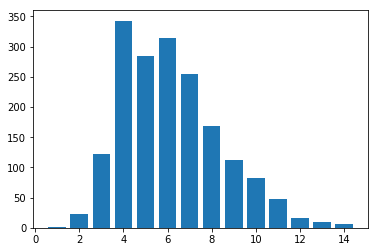

In [268]:
plt.bar([i for i in word_length.keys()], [len(val) for val in word_length.values()])

In [273]:
anagrams = []
for words in word_length.values():
    checked = [False]*len(words)
    for i, word in enumerate(words):
        if checked[i]:
            continue  # already checked this word

        anagram_list = []
        for j, other_word in enumerate(words):
            if not checked[j] and is_anagram(word, other_word) and other_word != word:
                anagram_list.append(other_word)
                checked[j] = True
                
        if len(anagram_list) > 0:
            anagram_list.append(word)
            anagrams.append(anagram_list)
            
        checked[i] = True

In [286]:
anagrams_by_length = defaultdict(list)
for words in anagrams:
    word_length = len(words[0])
    anagrams_by_length[word_length].append(words)

In [291]:
def get_letter_values(word, number):
    letter_values = {}
    for letter, num in zip(word, number):
        if letter in letter_values:
            if num != letter_values[letter]:
                return None
        else:
            letter_values[letter] = num 

    return letter_values


In [307]:
largest_square = int(math.sqrt(10**(max(anagrams_by_length.keys())+1)))
square_numbers = [i*i for i in range(largest_square)]

In [312]:
found_square_numbers = []

for square_number in square_numbers:
    square_str = str(square_number)
    number_length = len(square_str)
    try:
        anagram_list = anagrams_by_length[number_length]
    except KeyError:
        continue
        
    for words in anagram_list:  # get the words that are anagrams with each other
        word = words[0]
        other_word = words[1]
        
        if len(set(word)) != len(set(square_str)):
            break
        
        letter_values = get_letter_values(word, square_str)
        if letter_values is None:
            break  # break out of this loop -- there is not a match between this permutation and letters

        number = 0 
        for i, letter in enumerate(reversed(word)):
            number += int(letter_values[letter])*(10**i)

        sqrt = np.sqrt(number)
        if sqrt - np.floor(sqrt) != 0:
            break

        other_number = 0 
        for i, letter in enumerate(reversed(other_word)):
            other_number += int(letter_values[letter])*(10**i)

        other_sqrt = np.sqrt(other_number)
        if other_sqrt - np.floor(other_sqrt) == 0:  # both numbers are perfect squares
            found_square_numbers.append(number)
            found_square_numbers.append(other_number)
            print(word, number, sqrt, other_word, other_number, other_sqrt)

GOD 169 13.0 DOG 961 31.0
TEA 196 14.0 EAT 961 31.0
WHO 196 14.0 HOW 961 31.0
SIT 196 14.0 ITS 961 31.0
OWN 256 16.0 NOW 625 25.0
TEA 625 25.0 EAT 256 16.0
WHO 625 25.0 HOW 256 16.0
SIT 625 25.0 ITS 256 16.0
GOD 961 31.0 DOG 169 13.0
OWN 961 31.0 NOW 196 14.0
NAME 1024 32.0 MEAN 2401 49.0
RACE 1296 36.0 CARE 9216 96.0
SEAT 1296 36.0 EAST 2916 54.0
LIFE 1296 36.0 FILE 9216 96.0
TONE 1296 36.0 NOTE 9216 96.0
LEAD 1764 42.0 DEAL 4761 69.0
THUS 1764 42.0 SHUT 4761 69.0
HEAT 1936 44.0 HATE 1369 37.0
MEAL 1936 44.0 MALE 1369 37.0
RACE 2304 48.0 CARE 324 18.0
LIFE 2304 48.0 FILE 324 18.0
TONE 2304 48.0 NOTE 324 18.0
TEAR 2401 49.0 RATE 1024 32.0
NAME 4096 64.0 MEAN 9604 98.0
LEAD 4761 69.0 DEAL 1764 42.0
THUS 4761 69.0 SHUT 1764 42.0
SEAT 7056 84.0 EAST 576 24.0
RACE 9216 96.0 CARE 1296 36.0
LIFE 9216 96.0 FILE 1296 36.0
TONE 9216 96.0 NOTE 1296 36.0
TEAR 9604 98.0 RATE 4096 64.0
BROAD 18769 137.0 BOARD 17689 133.0


## Problem 104

In [474]:
def is_pandigital(number):
    return all([str(i) in number for i in range(1, 10)])

def is_pandigital2(number):
    return set(number) == set(['1', '2', '3', '4', '5', '6', '7', '8', '9'])
           

In [479]:
def fibonacci_closed(N):
    return ((1 + math.sqrt(5))**N - (1 - math.sqrt(5))**N )/(2**N * math.sqrt(5))


In [485]:
fibonacci_closed(100)

3.542248481792631e+20

In [478]:
for i, number in tqdm.tqdm(enumerate(fibonacci(1000000))):
    str_number = str(number)
    if len(str_number) > 8:
        if is_pandigital2(str_number[:9]) and is_pandigital2(str_number[-9:]):
            print(i+1, number)
            break

182228it [17:44, 56.92it/s]

ValueError: I/O operation on closed file

In [464]:
%time str(12343243)[-9:]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


'12343243'

In [470]:
def func1():
    return str(number)[-9:]

def func2():
    return str(number % (10**9))

In [472]:
%timeit func2

100000000 loops, best of 3: 17.5 ns per loop


In [473]:
%timeit func1

100000000 loops, best of 3: 17.4 ns per loop


## Problem 112

In [154]:
def is_bouncing(str_num):
    increasing = True
    decreasing = True
    bouncing = False

    for digit, next_digit in zip(str_num[:-1], str_num[1:]):
        if digit > next_digit:
            increasing = False
        elif digit != next_digit:
            decreasing = False

        if (not increasing) and (not decreasing):
            bouncing = True
            break
            
    return bouncing



In [169]:
target = 0.99  # percentage of bouncing numbers
num_bouncing = 0
i = 0
percentage = 0
while percentage < target:
    i += 1
    if is_bouncing(str(i)):
        num_bouncing += 1
    
    percentage = num_bouncing/i


print(percentage, i)

0.99 1587000


## Problem 118

In [96]:
def is_prime(number):
    if number > 1:
        if number == 2:
            return True
        if number % 2 == 0:
            return False
        for current in range(3, int(math.sqrt(number) + 1), 2):
            if number % current == 0:
                return False
        return True
    return False

def prime_generator(n):
    if n % 2 == 0:
        i = n-1
    else:
        i = n
    while i > 1:
        if is_prime(i):
            yield i
        i -= 2
    if n > 1:
        yield 2
    

In [113]:
digits = list(range(1, 10))
for combo in itertools.combinations(digits, 8):
    if sum(combo) % 3 != 0:
        missing = [i for i in digits if i not in combo]
        print(combo, missing)

(1, 2, 3, 4, 5, 6, 7, 9) [8]
(1, 2, 3, 4, 5, 6, 8, 9) [7]
(1, 2, 3, 4, 6, 7, 8, 9) [5]
(1, 2, 3, 5, 6, 7, 8, 9) [4]
(1, 3, 4, 5, 6, 7, 8, 9) [2]
(2, 3, 4, 5, 6, 7, 8, 9) [1]


In [110]:
12456789 % 3

0

## Problem 145

In [98]:
def odds_n_evens(n):
    if n < 10:
        even = n % 2 == 0
        return (int(not even), int(even))
    n = str(n)
    ln = len(n)
    odds = 0
    evens = 0
    for digit1, digit2 in zip(n[:ln//2], n[ln//2:]):
        even = int(digit1) % 2 == 0
        evens += even
        odds += (not even)
        
        even = int(digit2) % 2 == 0
        evens += even
        odds += (not even)        

    return (odds, evens)
    

In [8]:
def odds_n_evens_ends(n):
    n = str(n)
    return (int(n[0]) % 2 == 0) != (int(n[-1]) % 2 == 0)

In [2]:
def reverse_number(n):
    return int(str(n)[::-1])


def all_odd(n):
    for digit in str(n):
        if int(digit) % 2 == 0:
            return False
    
    return True


def is_reversable(n):
    if n % 10 == 0:
        return False
    
    return all_odd(n+reverse_number(n))

In [122]:
%%timeit
is_reversable(8452354) 

The slowest run took 4.40 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.64 µs per loop


In [123]:
%%timeit
odds_n_evens_ends(8452354) 

The slowest run took 4.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 841 ns per loop


In [15]:
def func1(N):
    num_reversable = 0
    for n in range(10, N):
        num_reversable += is_reversable(n)    

    print(num_reversable)

def func2(N):
    reversable = {}
    for n in range(10, N):
        if n not in reversable:
            if n % 10 != 0:
                rev = reverse_number(n)
                result_all_odd = all_odd(n + rev)
                reversable[n] = result_all_odd
                reversable[rev] = result_all_odd
            else:
                reversable[n] = False

    print(sum(reversable.values()))   



In [40]:
def func3(N):
    reversable = {}
    #num_reversable = 0
    for n in range(10, N, 10):
        base = (10**math.floor(math.log10(n)))
        rev_base = reverse_number(n)   
        for i in range(1, 10):
            if n+i not in reversable:
                rev = rev_base + base*i 
                result_all_odd = all_odd(n+i + rev)
                #num_reversable += result_all_odd
                reversable[n+i] = result_all_odd
                reversable[rev] = result_all_odd
            #else:
                #num_reversable += reversable[n+i]
    
    print(sum(reversable.values()))
            

In [14]:
for N in [1000, 10000, 100000]:
    %time func1(N)

120
CPU times: user 1.76 ms, sys: 2 µs, total: 1.76 ms
Wall time: 1.76 ms
720
CPU times: user 17 ms, sys: 319 µs, total: 17.3 ms
Wall time: 17.1 ms
720
CPU times: user 174 ms, sys: 2.07 ms, total: 176 ms
Wall time: 174 ms


In [44]:
for N in [1000, 10000, 100000]:
    %time func2(N)

120
CPU times: user 1.03 ms, sys: 6 µs, total: 1.03 ms
Wall time: 1.04 ms
720
CPU times: user 9.6 ms, sys: 123 µs, total: 9.72 ms
Wall time: 9.66 ms
720
CPU times: user 105 ms, sys: 1.52 ms, total: 107 ms
Wall time: 106 ms


In [45]:
for N in [1000, 10000, 100000]:
    %time func3(N)

120
CPU times: user 941 µs, sys: 1 µs, total: 942 µs
Wall time: 944 µs
720
CPU times: user 9.22 ms, sys: 269 µs, total: 9.49 ms
Wall time: 9.24 ms
720
CPU times: user 100 ms, sys: 1.15 ms, total: 101 ms
Wall time: 101 ms


## Problem 571

In [10]:
pandigitals = np.array([1023456789, 1023456798, 1023456879, 1023456897, 1023456978, 1023456987, 1023457689,
                        1023457698, 1023457869, 1023457896, 1023457968, 1023457986, 1023458679, 1023458697,
                        1023458769, 1023458796, 1023458967, 1023458976, 1023459678, 1023459687])


In [171]:
def change_base(number, orig_base, new_base):
    ln = len(number) - 1
    new_num = number_to_base(number[0]*(orig_base**(ln-0)), new_base)
    for i, digit in enumerate(number[1:]):
        new_num_ = number_to_base(digit*(orig_base**(ln-(i+1))), new_base)
        next_digit = 0
        for i, (digit_1, digit_2) in enumerate(zip(reversed(new_num), reversed(new_num_))):
            _next_digit, cur_digit = divmod(digit_1 + digit_2, new_base)
            new_num[-(i+1)] = cur_digit + next_digit
            next_digit = _next_digit
            
    return new_num

In [176]:
%time change_base([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], 2, 4)

CPU times: user 86 µs, sys: 0 ns, total: 86 µs
Wall time: 90.1 µs


[3, 2, 1, 1, 2, 3, 2, 0, 3]

In [175]:
%time number_to_base(to_base_10([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], 2), 4)

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 25 µs


[3, 2, 1, 1, 2, 3, 2, 0, 3]

In [173]:
print(number_to_base(235235, 2))
print(number_to_base(235235, 4))


[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]
[3, 2, 1, 1, 2, 3, 2, 0, 3]


In [31]:
def number_to_base(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [32]:
def to_base_10(num, base):
    output = 0
    for i, digit in enumerate(reversed(num)):
        output += digit * (base**i)
    return output


In [33]:
def is_pandigital(num, base):
    for i in range(base):
        if i not in num:
            return False
    
    return True

In [35]:
base = 12
starting = base**(base - 1) + sum([d*base**(base - 1 - d) for d in range(2, base)])

In [207]:
%%time
base = 10
super_pandigital = []
starting = base**(base - 1) + sum([d*base**(base - 1 - d) for d in range(2, base)])
starting = number_to_base(starting, base)
for i, num in enumerate(itertools.permutations(starting, base)):
    if (len(super_pandigital) > 9):
        break
    for b in range(base, 1, -1):
        _num = number_to_base(to_base_10(num, base), b)
        #print(_num, is_pandigital(_num, b))
        if not is_pandigital(_num, b):
            break
    else:  # no break
        super_pandigital.append(num)

CPU times: user 15.6 s, sys: 7.47 ms, total: 15.6 s
Wall time: 15.6 s


In [36]:
number_to_base(to_base_10(starting, 10), 12)

TypeError: argument to reversed() must be a sequence

In [202]:
super_pandigital

[]

In [203]:
i

8514629

In [191]:
reduce(int.__mul__, range(1, base+1), 1)

479001600

In [180]:
sum(to_base_10(num, 10) for num in super_pandigital)

20319792309

In [88]:
len(super_pandigital)

11

In [195]:
np.cumsum(range(13))

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45, 55, 66, 78])